<a href="https://colab.research.google.com/github/Rabittitan/MC-Team7/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Thư Viện

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Các thư viện cho mô hình hồi quy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Thư viện cho mạng nơ-ron
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

# Thư viện chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler

# Thư viện kiểm tra đa cộng tuyến
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 2. Load Dữ Liệu








In [292]:
df= pd.read_csv('/content/FINAL_USO1.csv')

## Hiển Thị Dữ Liệu


In [293]:
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3  2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4  2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

     Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0  21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1  18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2  12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3   9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4  11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   

   GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_C

In [294]:
df.shape

(1718, 81)

In [295]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

## Kiểm Tra Và Điền Dữ Liệu Bị Thiếu

In [297]:
print(df.isnull().sum())

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64


## Phân Tích Và Khám Phá Đặc Trưng

In [298]:
print(df[['Open', 'High', 'Low', 'Close', 'Adj Close']].describe())


              Open         High          Low        Close    Adj Close
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000
mean    127.323434   127.854237   126.777695   127.319482   127.319482
std      17.526993    17.631189    17.396513    17.536269    17.536269
min     100.919998   100.989998   100.230003   100.500000   100.500000
25%     116.220001   116.540001   115.739998   116.052502   116.052502
50%     121.915001   122.325001   121.369999   121.795002   121.795002
75%     128.427494   129.087498   127.840001   128.470001   128.470001
max     173.199997   174.070007   172.919998   173.610001   173.610001


In [299]:
# Chuyển đổi định dạng ngày tháng
df['Date'] = pd.to_datetime(df['Date'])

In [300]:
correlation = df.corr()
print(correlation)


                   Date      Open      High       Low     Close  Adj Close  \
Date           1.000000 -0.686439 -0.690066 -0.683287 -0.686721  -0.686721   
Open          -0.686439  1.000000  0.999515  0.999442  0.998976   0.998976   
High          -0.690066  0.999515  1.000000  0.999262  0.999535   0.999535   
Low           -0.683287  0.999442  0.999262  1.000000  0.999532   0.999532   
Close         -0.686721  0.998976  0.999535  0.999532  1.000000   1.000000   
...                 ...       ...       ...       ...       ...        ...   
USO_High      -0.874276  0.634864  0.637208  0.633623  0.635311   0.635311   
USO_Low       -0.871211  0.634277  0.636538  0.633140  0.634732   0.634732   
USO_Close     -0.872838  0.635138  0.637483  0.633994  0.635675   0.635675   
USO_Adj Close -0.872838  0.635138  0.637483  0.633994  0.635675   0.635675   
USO_Volume     0.497762 -0.455920 -0.454913 -0.457628 -0.456193  -0.456193   

                 Volume   SP_open   SP_high    SP_low  ...   GD

In [301]:
df.set_index('Date', inplace=True)

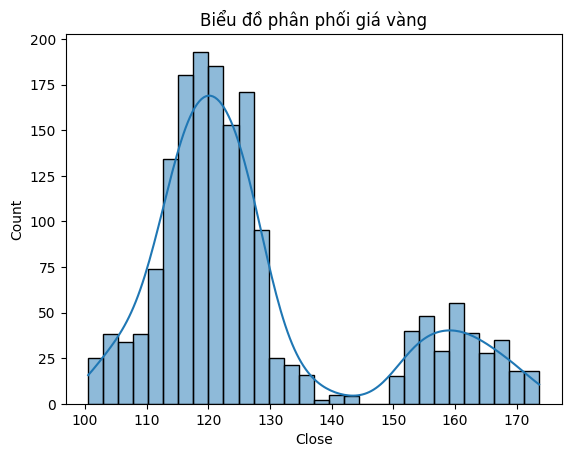

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Biểu đồ phân phối giá vàng')
plt.show()


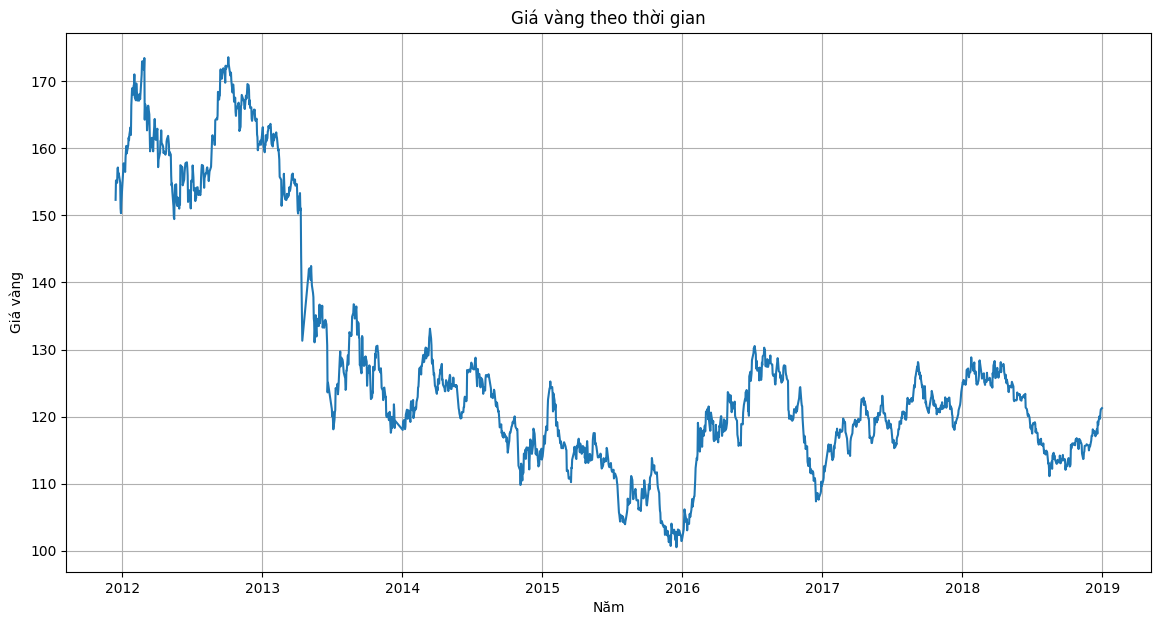

In [303]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'])
plt.title('Giá vàng theo thời gian')
plt.xlabel('Năm')
plt.ylabel('Giá vàng')
plt.grid()
plt.show()

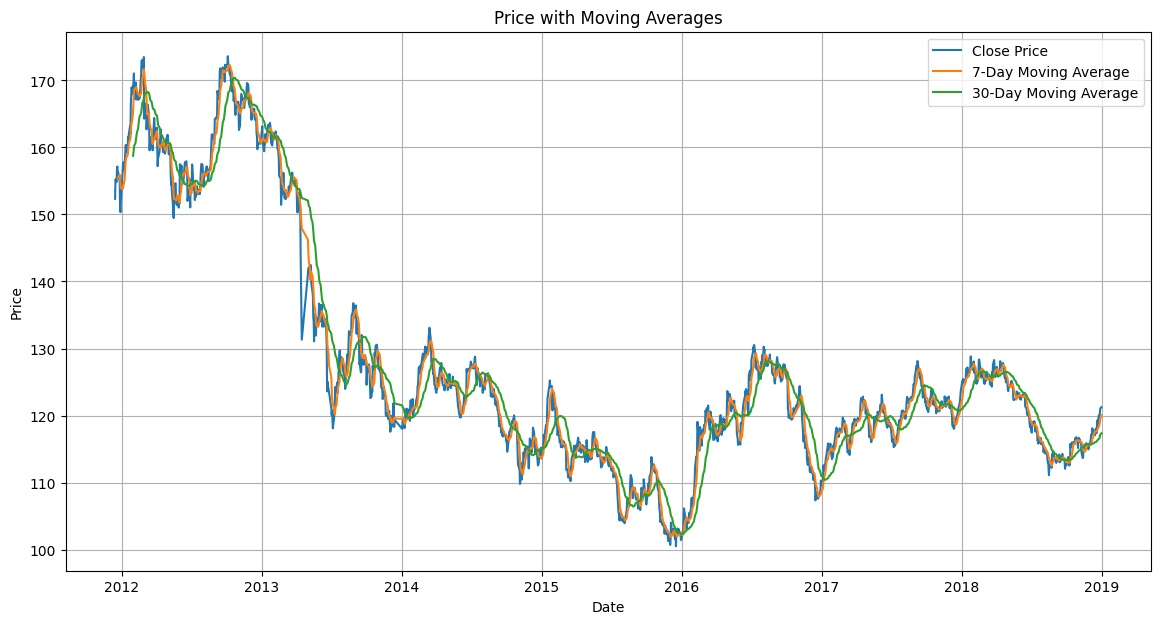

In [304]:

df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA_7'], label='7-Day Moving Average')
plt.plot(df.index, df['MA_30'], label='30-Day Moving Average')
plt.title('Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [305]:
df['MA_7'].fillna(df['MA_7'].mean(), inplace=True)
df['MA_30'].fillna(df['MA_30'].mean(), inplace=True)


<ipython-input-305-a5900e4f4516>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MA_7'].fillna(df['MA_7'].mean(), inplace=True)
<ipython-input-305-a5900e4f4516>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

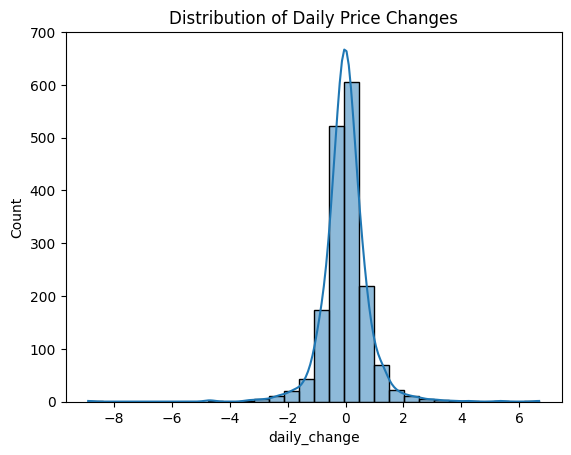

In [248]:

df['daily_change'] = df['Close'] - df['Open']


sns.histplot(df['daily_change'], bins=30, kde=True)
plt.title('Distribution of Daily Price Changes')
plt.show()


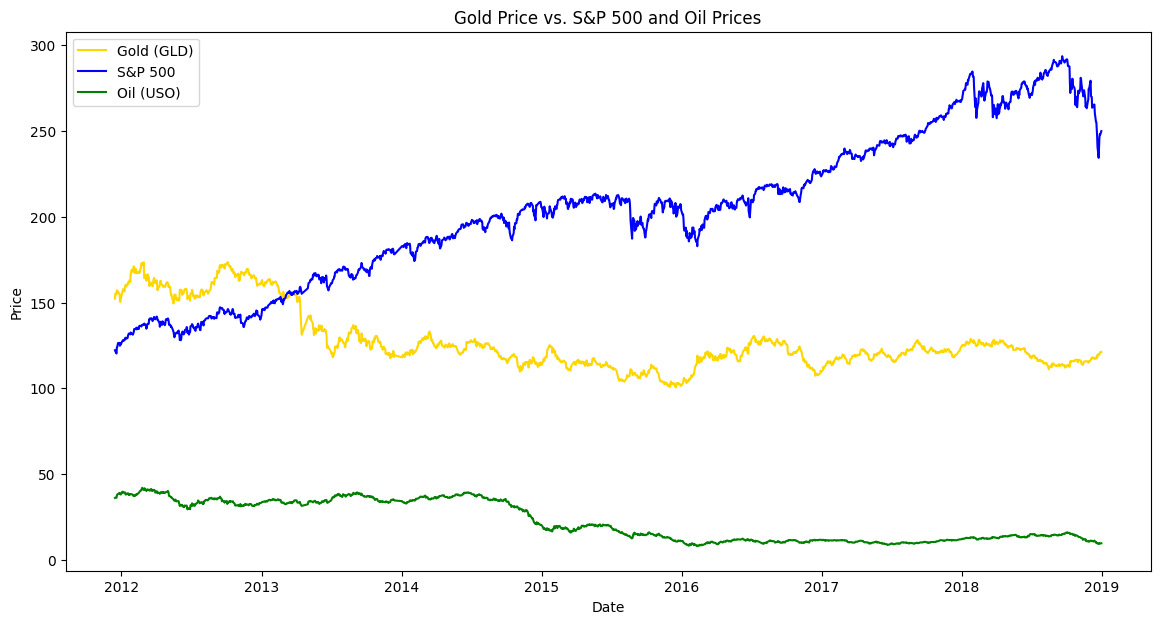

In [249]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Gold (GLD)', color='gold')
plt.plot(df.index, df['SP_close'], label='S&P 500', color='blue')
plt.plot(df.index, df['USO_Close'], label='Oil (USO)', color='green')
plt.title('Gold Price vs. S&P 500 and Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [250]:
features = [
        'Open', 'High', 'Low', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close',  'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close',  'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume','MA_7','MA_30']

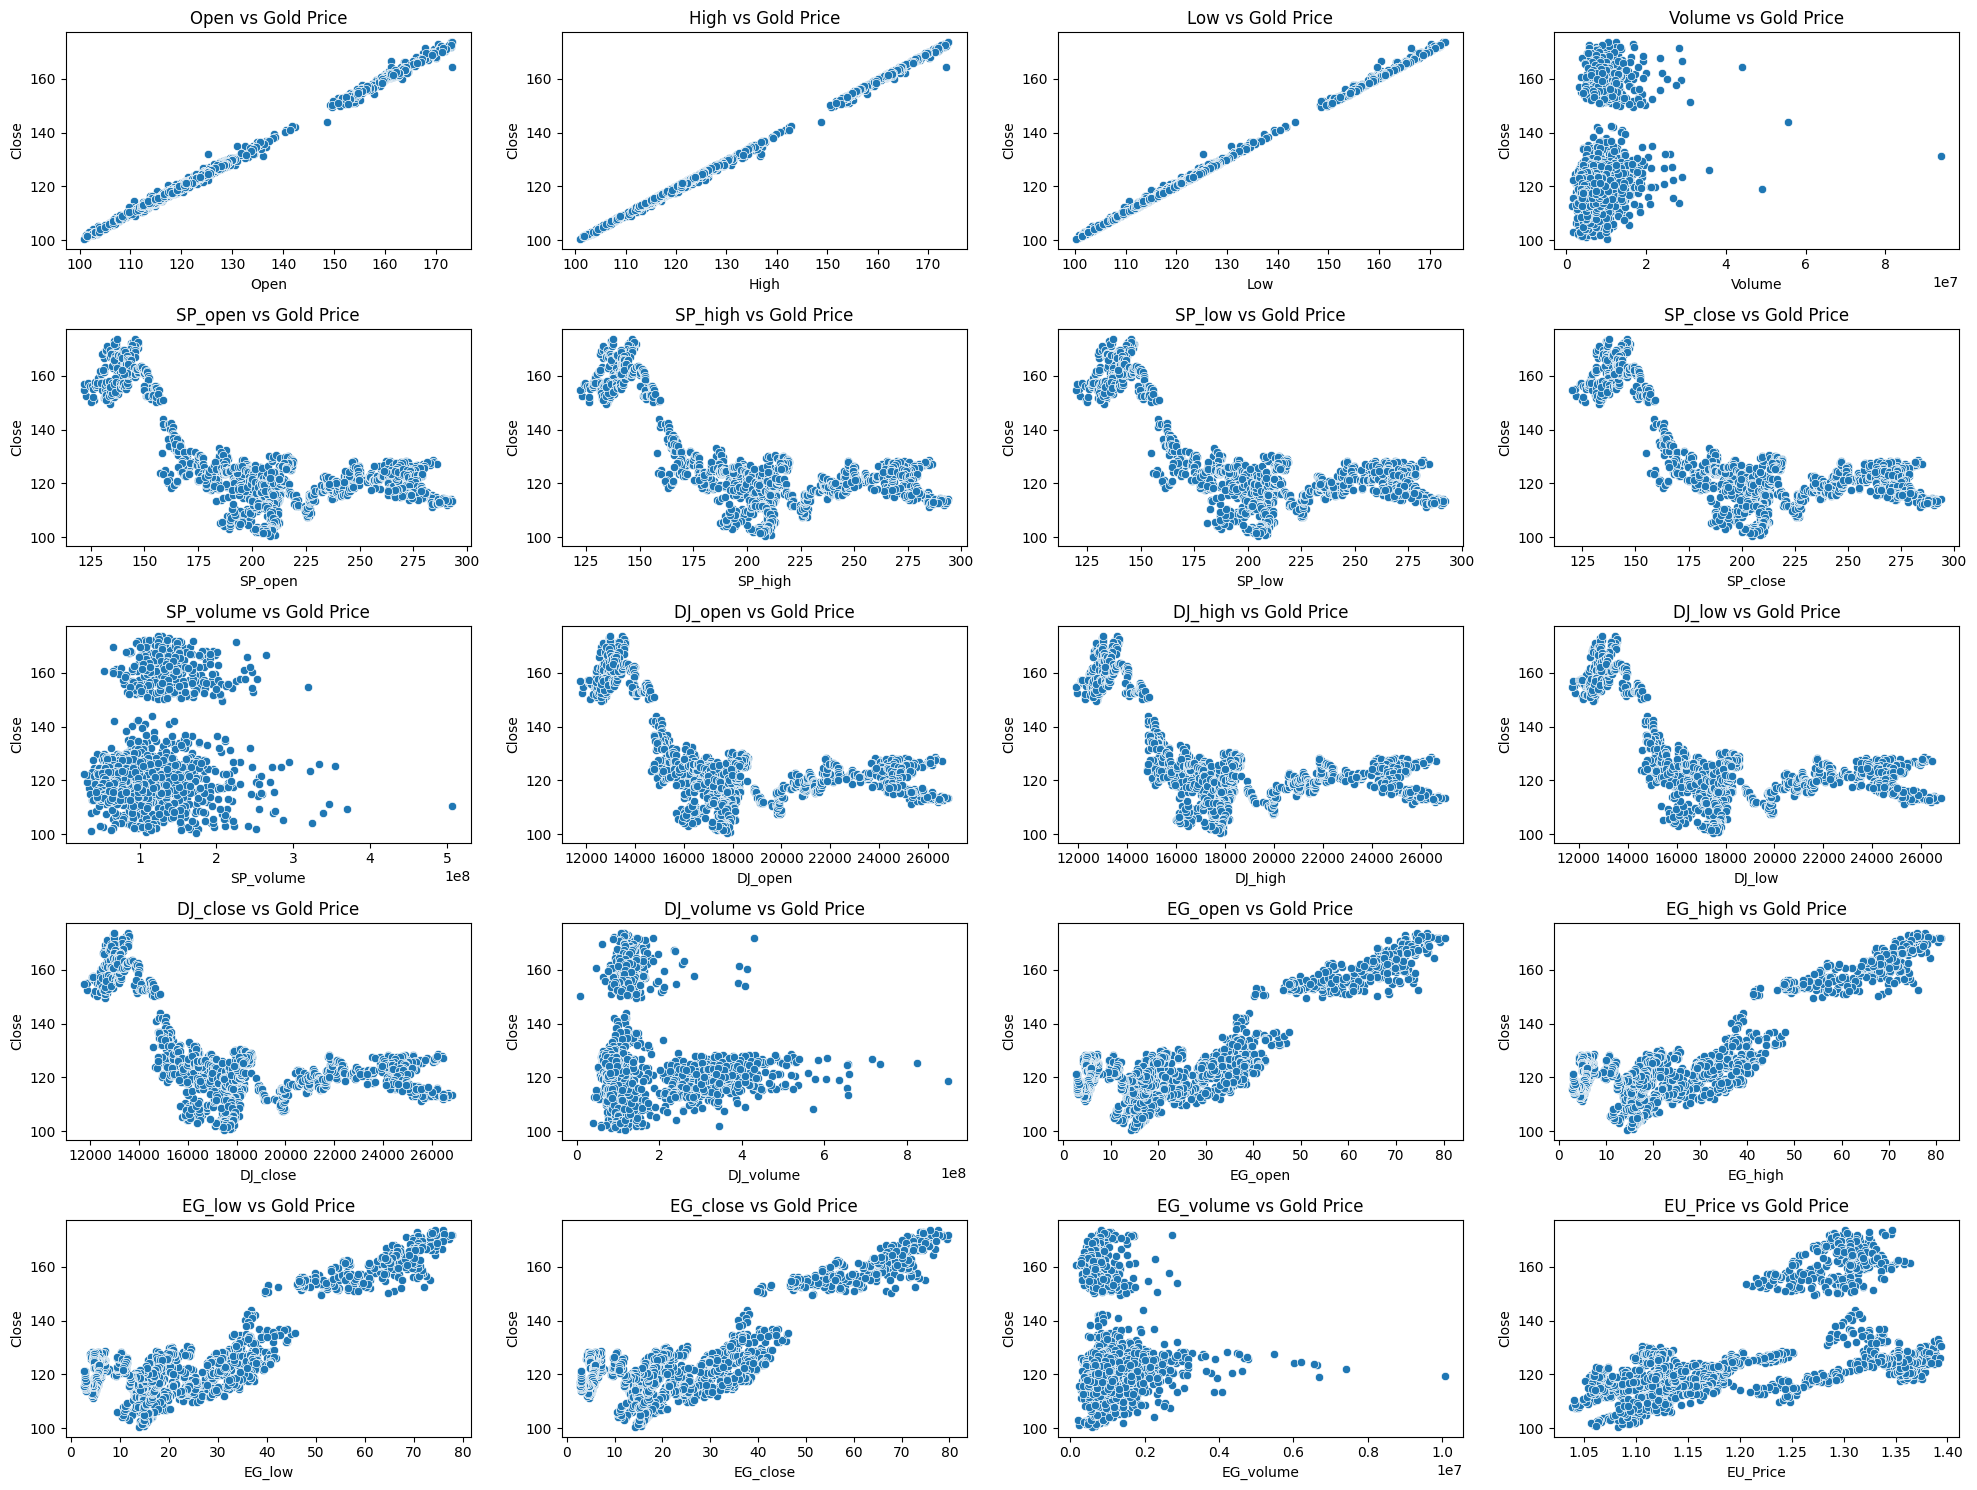

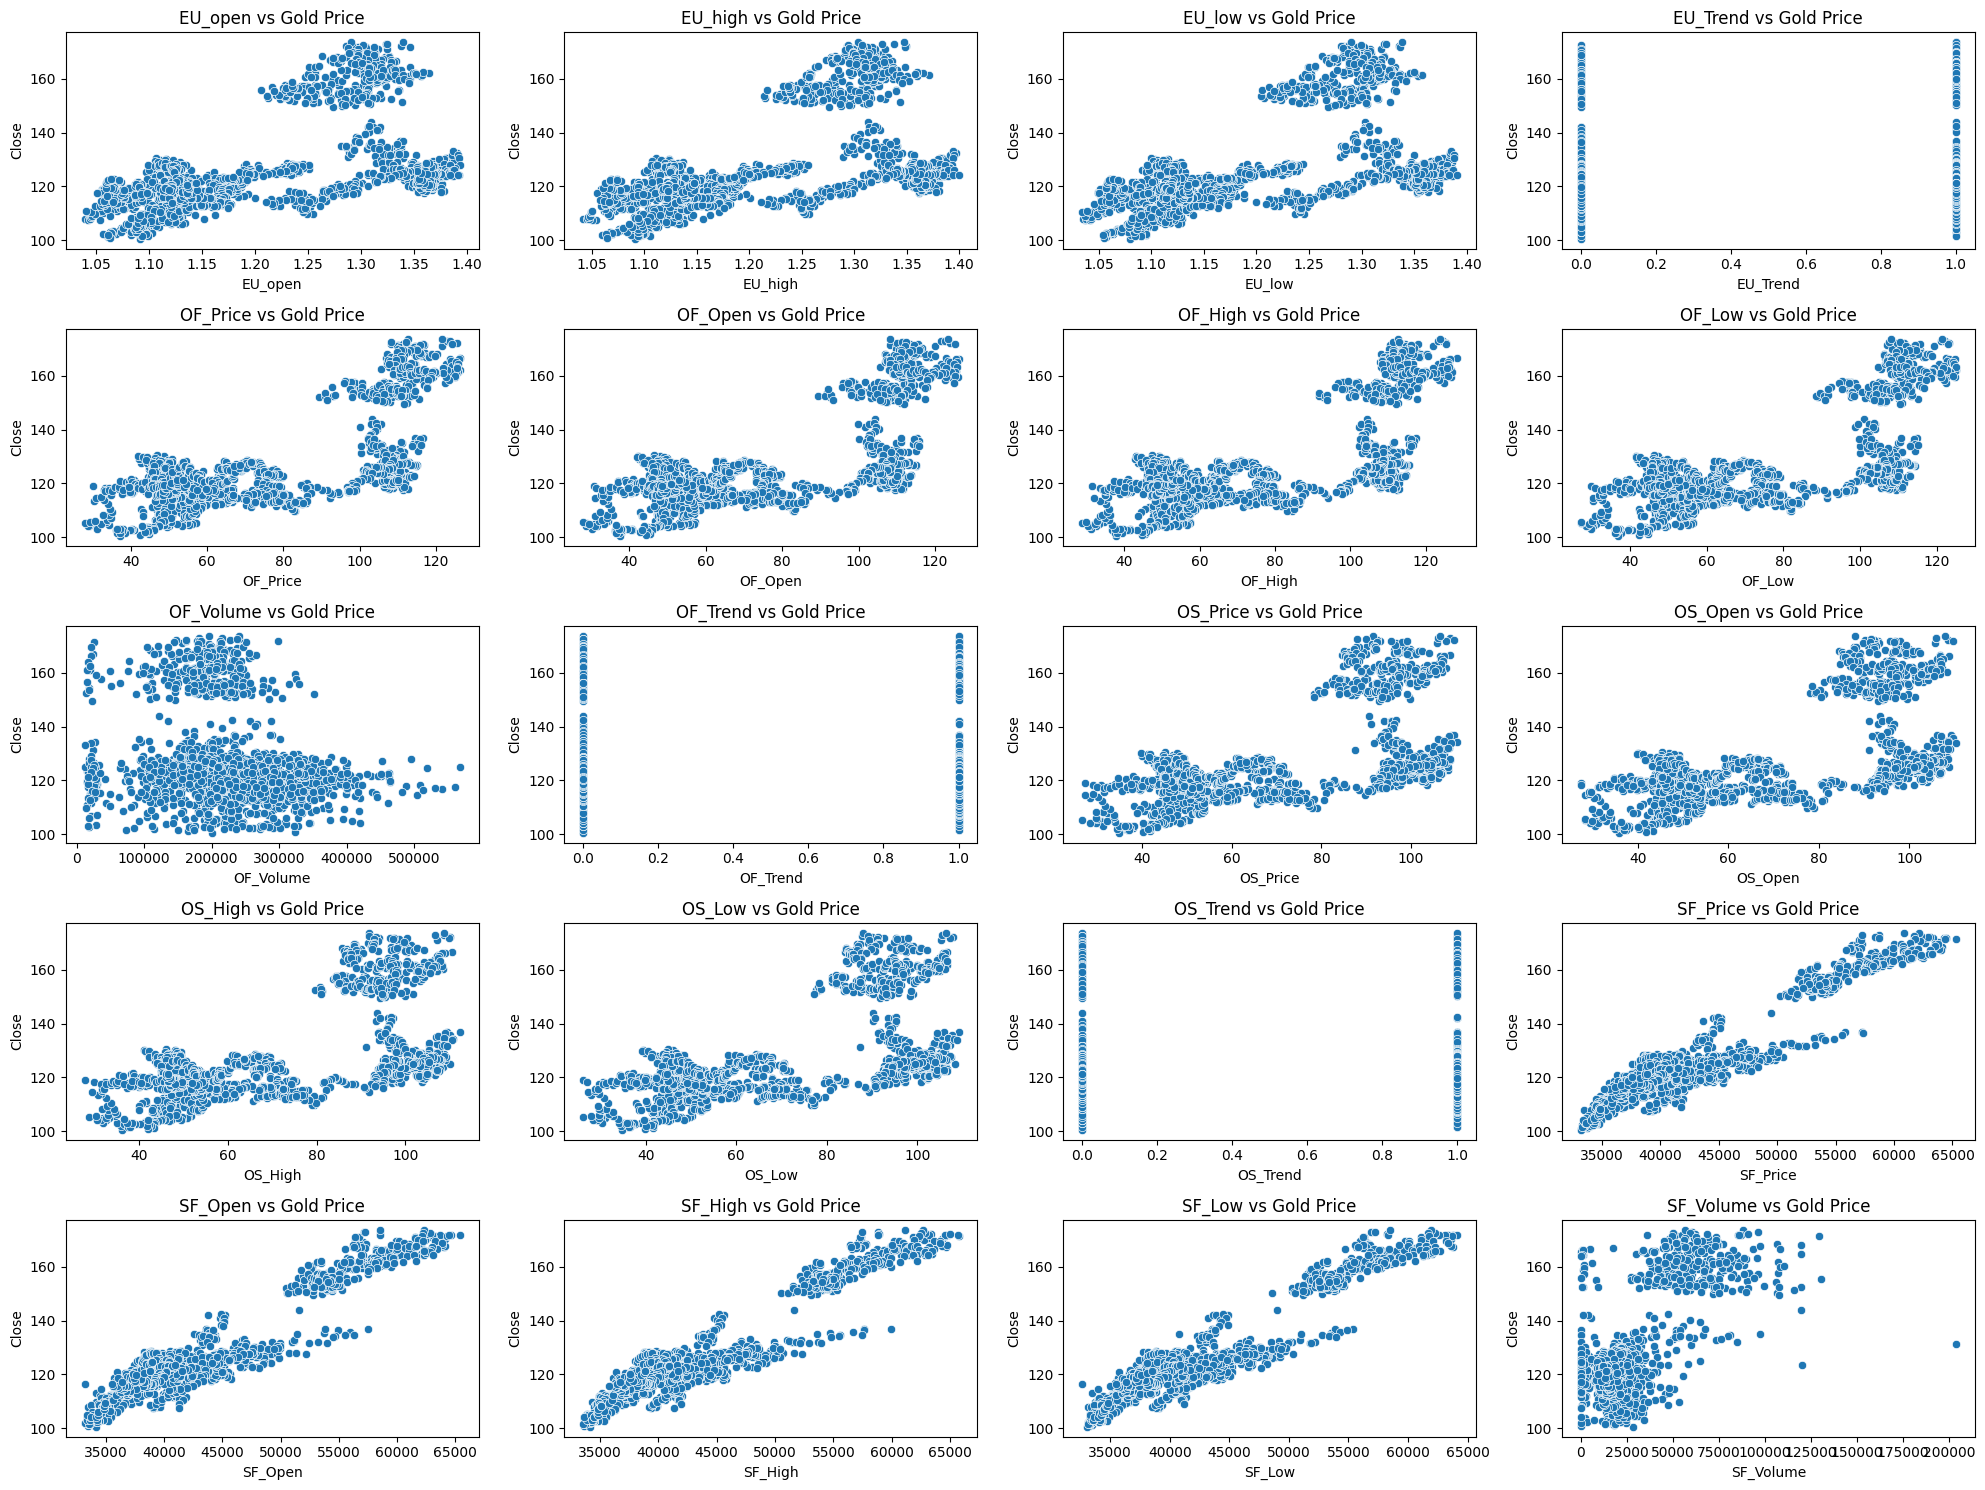

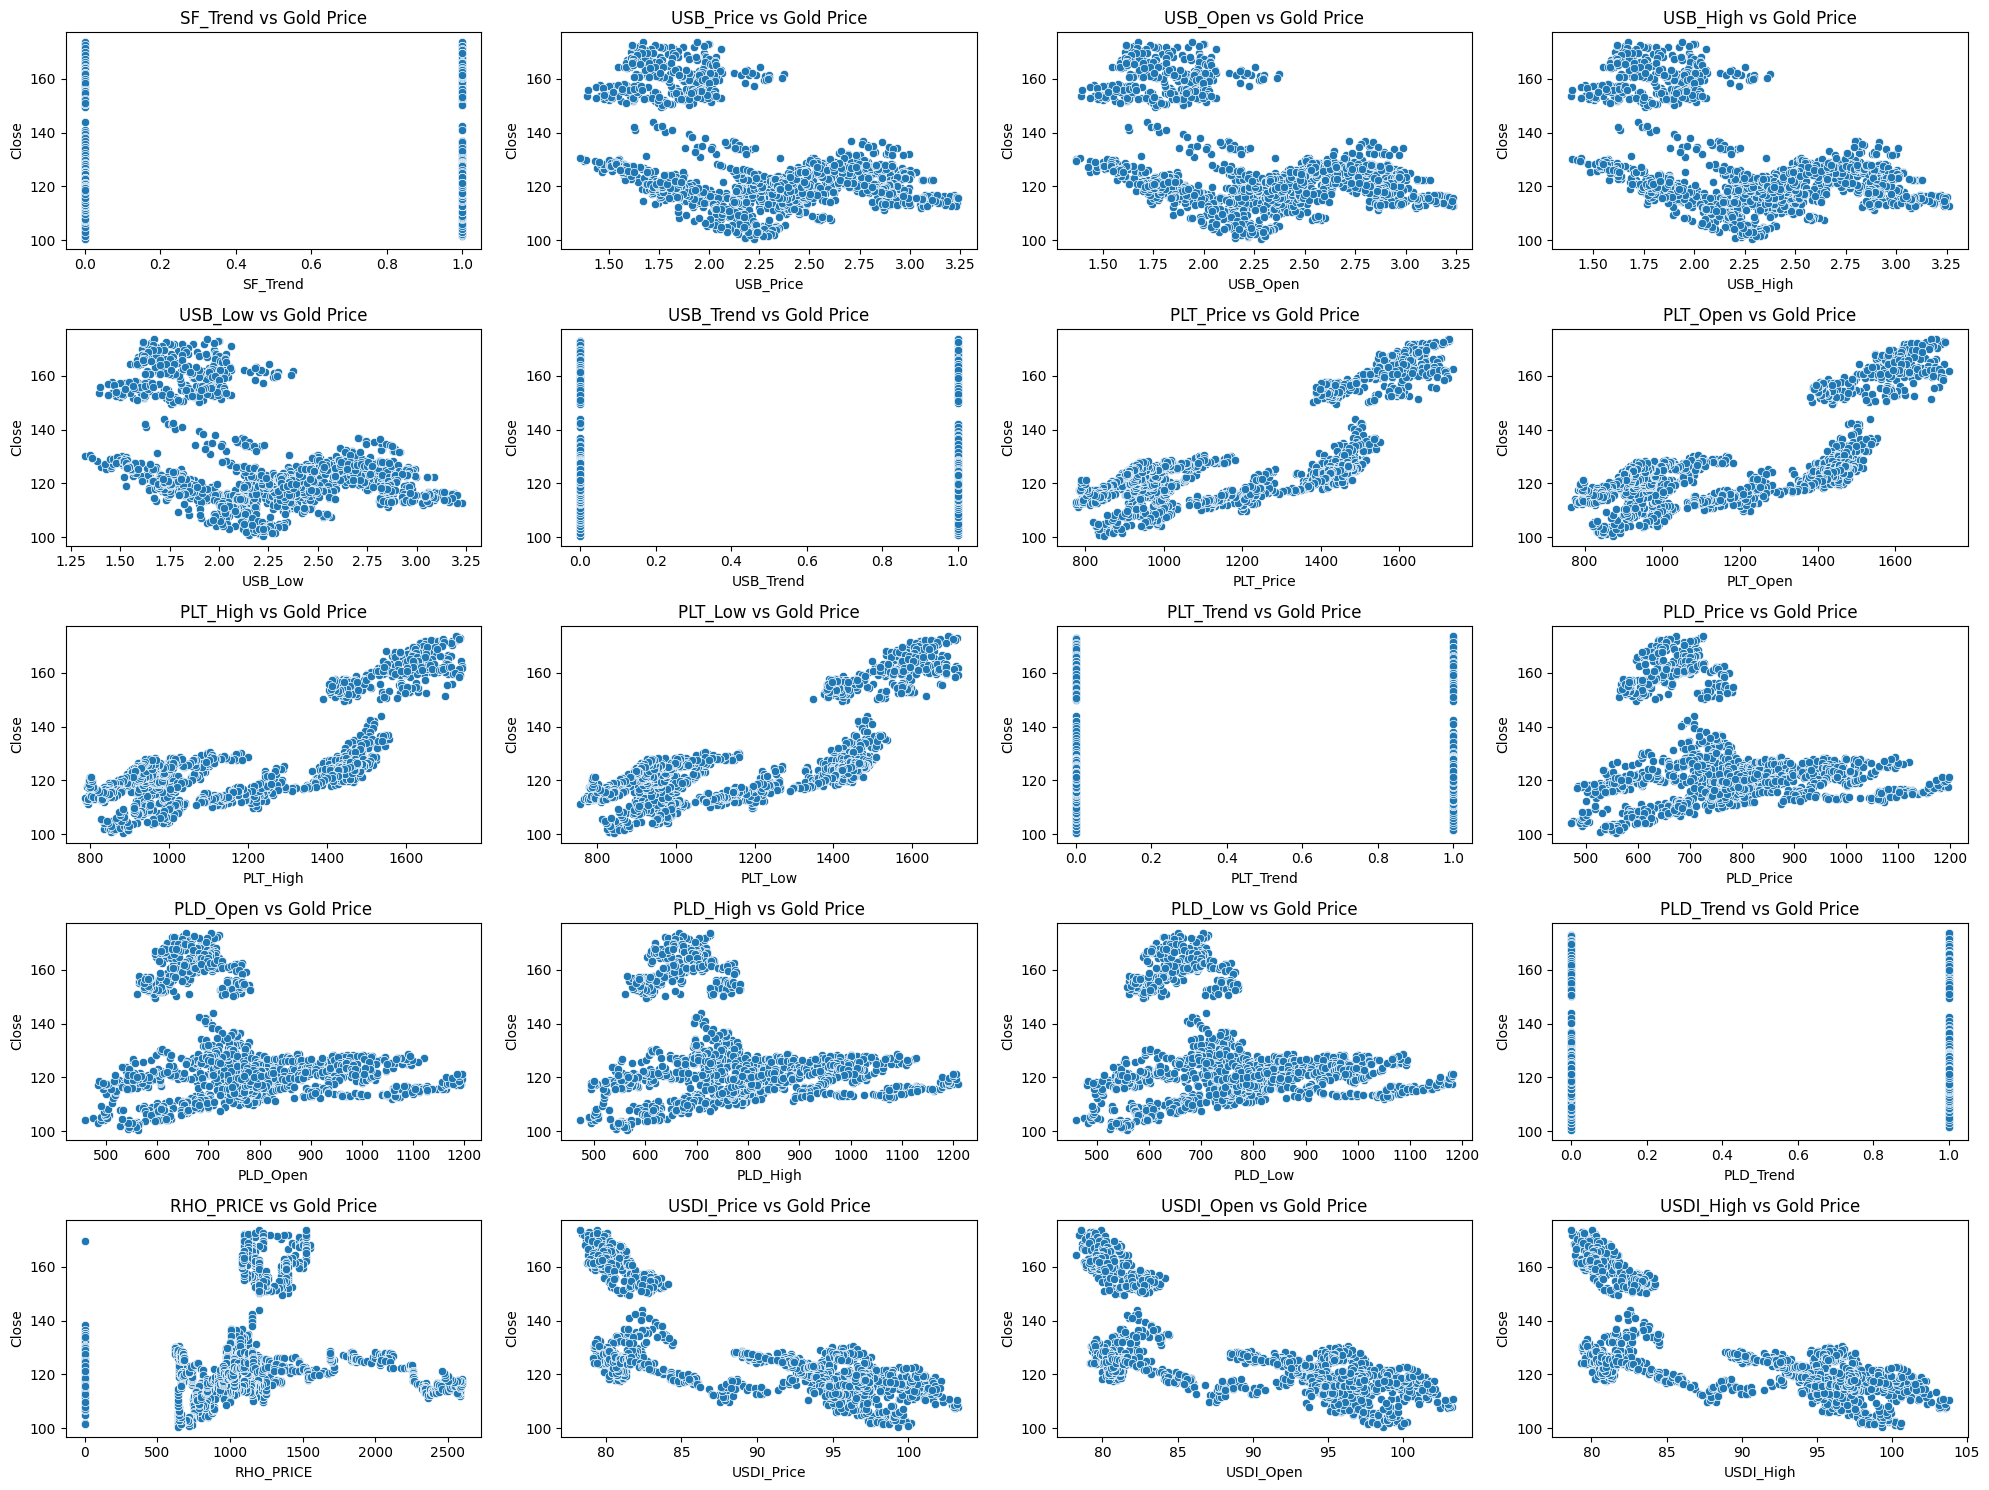

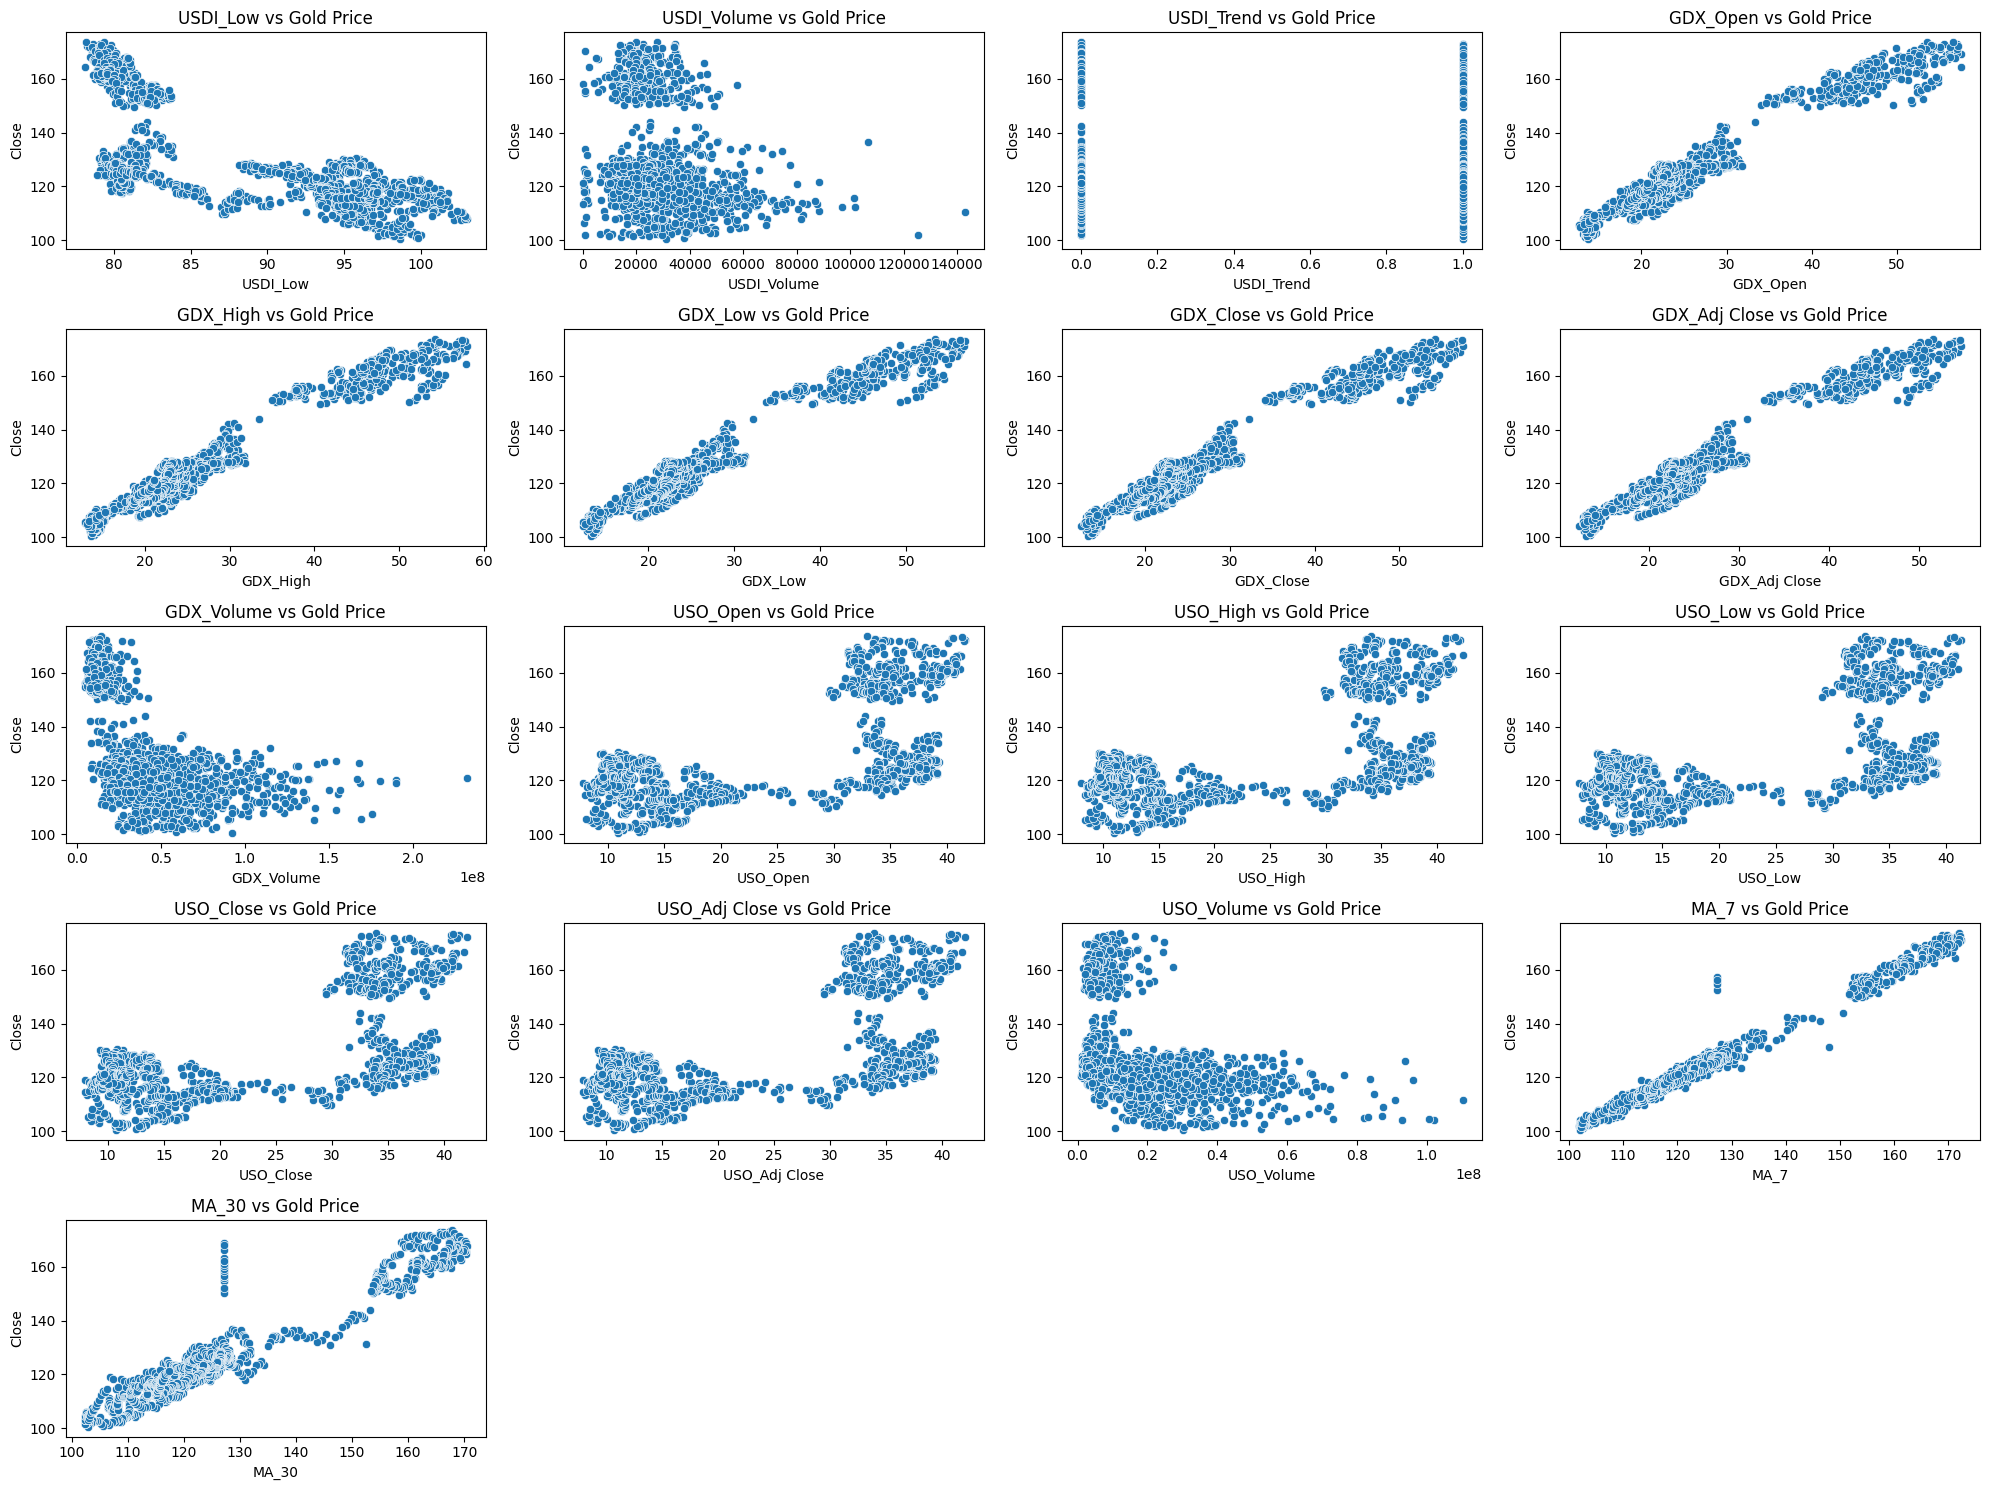

In [251]:
n_cols = 4
n_rows = 5
n_features = len(features)

# Vẽ biểu đồ cho từng nhóm thuộc tính
for start in range(0, n_features, n_cols * n_rows):
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features[start:start + n_cols * n_rows]):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.scatterplot(data=df, x=feature, y='Close')
        plt.title(f'{feature} vs Gold Price')
    plt.tight_layout()
    plt.show()


## Chuẩn Bị Dữ liệu


In [252]:

train = df[df.index.year < 2017]  # Tập huấn luyện: 2011 - 2016
test = df[df.index.year == 2017]   # Tập kiểm tra: 2017
predict = df[df.index.year == 2018] # Tập dự đoán: 2018

# Kiểm tra kích thước các tập dữ liệu
print(f'Tập huấn luyện: {train.shape}')
print(f'Tập kiểm tra: {test.shape}')
print(f'Tập để dự đoán: {predict.shape}')

Tập huấn luyện: (1222, 83)
Tập kiểm tra: (248, 83)
Tập để dự đoán: (248, 83)


In [253]:
X_train = train[[
  'Open', 'High', 'Low','EG_open', 'EG_high', 'EG_low','SF_Price', 'SF_Open',
  'SF_High', 'SF_Low',  'SF_Trend','RHO_PRICE', 'GDX_Open', 'GDX_High',
  'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume','MA_7','MA_30']]

y_train = train['Close']

In [254]:
X_test =test[[
        'Open', 'High', 'Low',
       'EG_open', 'EG_high', 'EG_low','SF_Price', 'SF_Open',
       'SF_High', 'SF_Low',  'SF_Trend','RHO_PRICE', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume','MA_7','MA_30']]
y_test= test['Close']

In [255]:
X_predict = predict[[
        'Open', 'High', 'Low',
       'EG_open', 'EG_high', 'EG_low','SF_Price', 'SF_Open',
       'SF_High', 'SF_Low',  'SF_Trend','RHO_PRICE', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume','MA_7','MA_30']]

# LinearRegression

In [281]:
# Xây dựng mô hình hồi quy
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [282]:
predictions_test = model.predict(X_test)

In [283]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, predictions_test)
r2 = r2_score(y_test, predictions_test)

In [284]:
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.09056564447314402
R² Score: 0.9997094260374605


In [285]:
# Tách các đặc trưng cho tập dự đoán

# Dự đoán
predictions_predict = model.predict(X_predict)
# Hiển thị kết quả
results_predict = pd.DataFrame({'Date': predict.index, 'Actual': predict['Close'], 'Predicted': predictions_predict})
print(results_predict.head())

                 Date      Actual   Predicted
Date                                         
2018-01-02 2018-01-02  125.150002  124.962360
2018-01-03 2018-01-03  124.820000  124.543495
2018-01-04 2018-01-04  125.459999  125.619926
2018-01-05 2018-01-05  125.330002  125.322664
2018-01-08 2018-01-08  125.309998  125.108282


In [286]:
results_predict['Error'] = results_predict['Actual'] - results_predict['Predicted']
results_predict['Absolute Error'] = np.abs(results_predict['Error'])
# Tính MAE và MSE
mae = results_predict['Absolute Error'].mean()
mse = (results_predict['Error']**2).mean()
# In kết quả
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 0.13480353536282105
MSE: 0.026884982617477366


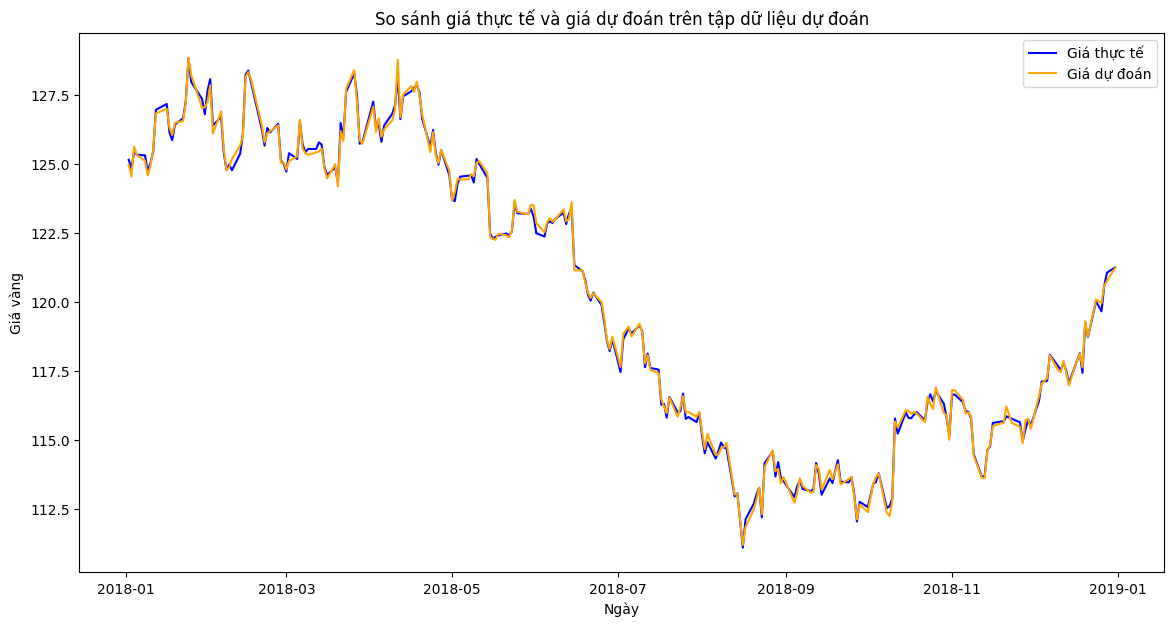

In [287]:
plt.figure(figsize=(14, 7))
plt.plot(predict.index, predict['Close'], label='Giá thực tế', color='blue')
plt.plot(predict.index, predictions_predict, label='Giá dự đoán', color='orange')
plt.title('So sánh giá thực tế và giá dự đoán trên tập dữ liệu dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.legend()
plt.show()

# RandomForest

In [263]:
# Xây dựng mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [264]:
predictions_test = rf_model.predict(X_test)

In [265]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, predictions_test)
r2 = r2_score(y_test, predictions_test)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.08480015036884933
R² Score: 0.9912752238846857


                 Date      Actual   Predicted
Date                                         
2018-01-02 2018-01-02  125.150002  124.957836
2018-01-03 2018-01-03  124.820000  124.508491
2018-01-04 2018-01-04  125.459999  125.631220
2018-01-05 2018-01-05  125.330002  125.339294
2018-01-08 2018-01-08  125.309998  125.126143


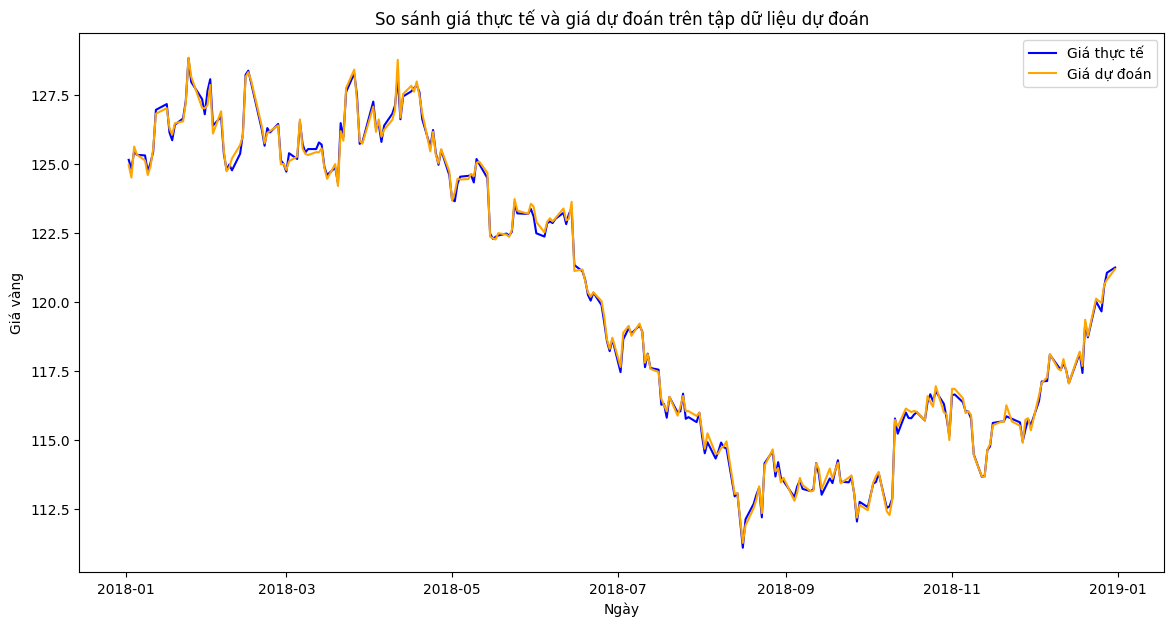

In [266]:
# Dự đoán
predictions_predict = model.predict(X_predict)
# Hiển thị kết quả
results_predict = pd.DataFrame({'Date': predict.index, 'Actual': predict['Close'], 'Predicted': predictions_predict})
print(results_predict.head())
plt.figure(figsize=(14, 7))
plt.plot(predict.index, predict['Close'], label='Giá thực tế', color='blue')
plt.plot(predict.index, predictions_predict, label='Giá dự đoán', color='orange')
plt.title('So sánh giá thực tế và giá dự đoán trên tập dữ liệu dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.legend()
plt.show()

# Mạng nơ-ron


In [267]:

X = df[[
        'Open', 'High', 'Low',
       'EG_open', 'EG_high', 'EG_low','SF_Price', 'SF_Open',
       'SF_High', 'SF_Low',  'SF_Trend','RHO_PRICE', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume','MA_7','MA_30']]

y = df['Close']

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get the number of features (columns) in your input data
input_dim = X_train_scaled.shape[1] # Assign the value to input_dim

# Xây dựng mô hình mạng nơ-ron
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.01))) # Use the defined input_dim
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1))


# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

# Huấn luyện mô hình
# history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test_scaled)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 16286.4365 - val_loss: 15052.4326
Epoch 2/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14466.2139 - val_loss: 11871.3613
Epoch 3/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10550.6367 - val_loss: 6450.4375
Epoch 4/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5440.2456 - val_loss: 3634.1821
Epoch 5/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3661.4116 - val_loss: 3286.4885
Epoch 6/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3341.2700 - val_loss: 3084.1643
Epoch 7/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3249.1626 - val_loss: 2814.4246
Epoch 8/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2790.8015 - val_loss: 2552.8650
Epoch 9/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2643.8738 - val_loss: 2266.4233
Epoch 10/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2288.8882 - val_loss: 1934.7418
Epoch 11/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2058.2402 - val_loss: 1630.0817
Ep

In [268]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 5.001278361497406
R² Score: 0.9839537246191148


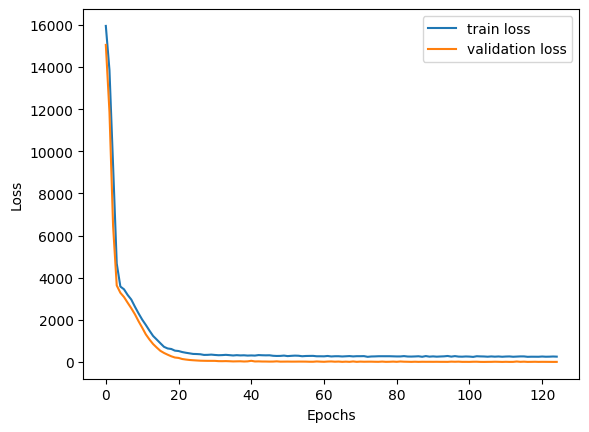

In [269]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Tối ưu model

In [274]:
caler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [275]:
def calculate_vif(X):
    vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    return vif

vif = calculate_vif(pd.DataFrame(X_train_scaled))
print(vif)


0     3273.314528
1     2554.761340
2     2232.296495
3     3238.173322
4     2777.244568
5     3036.631096
6     1646.035833
7     1149.615045
8     1503.025703
9     1306.487944
10       1.639928
11       1.430548
12    5408.005211
13    5797.054507
14    5953.694877
15    9790.952354
16    6177.397735
17       2.503743
18      82.511700
19      16.862999
dtype: float64


In [276]:
lasso = Lasso(alpha=0.1)  # Tinh chỉnh alpha cho phù hợp
lasso.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e+02, tolerance: 4.207e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [288]:


scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", scores)


Cross-validation scores: [0.99975839 0.99976808 0.9998248  0.99979597 0.99971635]


In [289]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid = GridSearchCV(ridge, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_)
best_alpha = grid.best_params_['alpha']

Best alpha: {'alpha': 0.1}


In [290]:
# Xây dựng mô hình hồi quy với alpha tốt nhất
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.32273983752443064
MAE: 0.2096560787072128


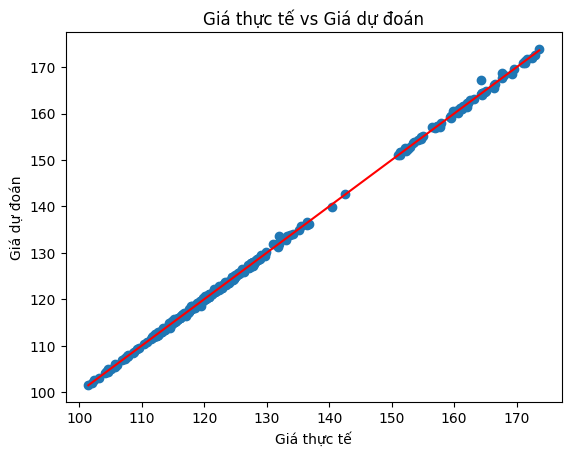

In [291]:


# Dự đoán trên tập test
y_pred = final_model.predict(X_test_scaled)

# Tính toán các chỉ số đánh giá
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

plt.scatter(y_test, y_pred)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('Giá thực tế vs Giá dự đoán')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Đường y=x
plt.show()


# Kết quả sau khi tối ưu mô hình:
---------------------------------
Mô hình tốt nhất được tìm thấy là Ridge Regression với alpha = 0.1
RMSE: 0.32273983752443064
MAE: 0.2096560787072128

Các bước tối ưu:
- Loại bỏ các đặc trưng có VIF cao.
- Áp dụng Lasso để giảm thiểu ảnh hưởng của các đặc trưng không quan trọng.
- Sử dụng Ridge Regression để tránh overfitting.
- Tìm kiếm tham số tối ưu (alpha) bằng GridSearchCV.
